In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import networkx as nx

# №1

$$ f(x) = \frac{1}{2} x^T Ax - b^T x + c $$

$$ \nabla f(x) = \frac{1}{2}(\nabla Ax)x + \frac{1}{2} Ax(\nabla x) - b(\nabla x) $$

$$ (\nabla Ax)x - b(\nabla x) = 0 $$

$$Ax_* - b = 0 $$

Значит $x_*$ - экстремум


Докажем, что $x_*$ - минимум. Для этого представим функцию с помощью скалярных произведений:

$$ f(x) = \frac{1}{2}(Ax, x) - (b, x) + c $$

И прибавим добавку к x и посмотрим на разницу между $f(x + t)$ и $f(x)$:

$$
f(x + t) = \frac{1}{2}((Ax + At), (x + t)) - (b, (x + t)) + c = \frac{1}{2}(Ax, x) + \frac{1}{2}(At, x) + \frac{1}{2}(Ax, t) +  \frac{1}{2}(At, t) - (b, x) - (b, t) + c
$$

Теперь посмотрим на разницу:

$$f(x + t) - f(x) = \frac{1}{2}(Ax, x) + \frac{1}{2}(At, x) + \frac{1}{2}(Ax, t) +  \frac{1}{2}(At, t) - (b, x) - (b, t) + c - \frac{1}{2}(Ax, x) + (b, x) - c = $$

$$ = \frac{1}{2}(At, x) + \frac{1}{2}(Ax, t) +  \frac{1}{2}(At, t) - (b, t)  $$

При $x = x_* = A^{-1}b$:

$$f(x_* + t) - f(x_*) = \frac{1}{2}(At, A^{-1}b) + \frac{1}{2}(AA^{-1}b, t) +  \frac{1}{2}(At, t) - (b, t) = 
\frac{1}{2}(At, A^{-1}b)  +  \frac{1}{2}(At, t) - \frac{1}{2}(b, t) 
$$ 

$$(At, A^{-1}b)  +  (At, t) - (b, t) = (A^{-1}b)^TAt + (At)^Tt - b^Tt = b^T A^{-1} At + t^TAt - b^Tt = b^Tt + t^TAt - b^Tt =  t^TAt
$$

Можем делать этот переход, так как матрица A - симметричная. А так же $t^TAt >= 0$, так как A положительно определенная. Доказали, что $x_*$ - минимум.

Шаг градиента:
$$
x_{i+1}=x_i-\tau_i \nabla f\left(x_i\right)
$$

$$
x_{i+1}= x_i - \alpha_i\left(A x_i - b \right) = x_i+\alpha_i r_i
$$

Считаем $\alpha_i$:

$$
f(x_{i+1}) = \frac{1}{2}(A x_{i+1}, x_{i+1}) - (b, x_{i+1}) + c = \frac{1}{2}(A(x_i+\alpha_i r_i),  x_i+\alpha_i r_i) - (b, x_i+\alpha_i r_i) + c
$$

$$
\frac{d f(x_{i+1})}{d \alpha_i} =  \frac{1}{2}\left(A r_i, x_i\right) + \frac{1}{2}\left(A x_i, r_i\right) + \alpha_i\left(A r_i, r_i\right) - \left(b, r_i\right) = 0
$$

$$
\left(A x_i, r_i\right) + \alpha_i\left(A r_i, r_i\right) - \left(b, r_i\right) = 0
$$

$$
\left(A x_i - b, r_i\right) + \alpha_i\left(A r_i, r_i\right)  = 0
$$

$$
\left(r_i, r_i\right) + \alpha_i\left(A r_i, r_i\right)  = 0
$$

$$
\alpha_i =  - \frac{\left(r_i, r_i\right)}{\left(A r_i, r_i\right)}
$$


<Figure size 360x360 with 0 Axes>

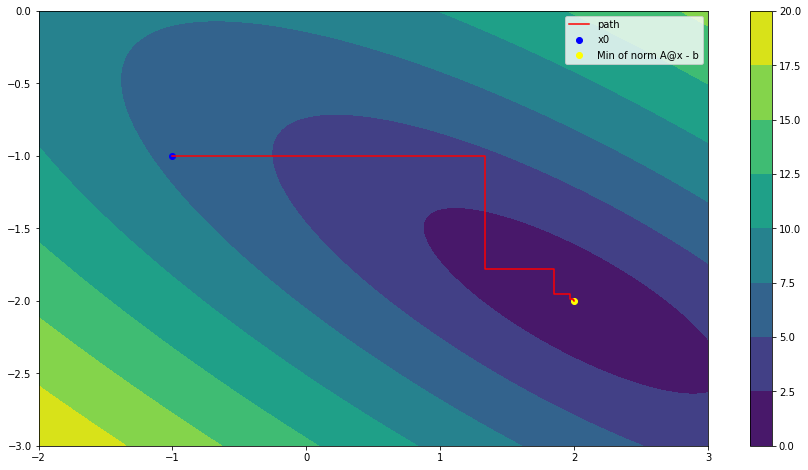

In [2]:
A = np.array([[3, 2], [2, 6]])
b = np.array([2, -8])
x0 = np.array([-1, -1])

def plot_path(xs: np.array):    
    x_range = np.linspace(min(xs[:,0]) - 1, max(xs[:,0]) + 1, 100)
    y_range = np.linspace(min(xs[:,1]) - 1, max(xs[:,1]) + 1, 100)
    X, Y = np.meshgrid(x_range, y_range)

    fig = plt.figure(figsize=(5, 5))
    Z = np.zeros((len(X), len(Y)))
    for i in range(len(X[0])):
        for j in range(len(Y[0])):
            Z[i, j] = np.linalg.norm(A@np.array([X[0][i], Y[:, 0][j]]) - b)
    
    plt.figure(figsize=(15, 8))
    cp = plt.contourf(X, Y, Z.T)
    plt.plot(xs[:, 0], xs[:, 1], color = 'red', label = "path")
    plt.scatter(x0[0], x0[1], label='x0', color = 'blue') 
    solution = np.linalg.inv(A) @ b
    plt.scatter(solution[0], solution[1], label='Min of norm A@x - b', color = 'yellow')
    fig.colorbar(cp)
    plt.legend()
    plt.show()

def steepest_descent(A: np.array, b: np.array, x0: np.array, n_steps: int = 100):
    x = x0.copy()
    xs = [x0]
    for i in range(n_steps+1):
        r = A.dot(x) - b
        alpha = - r.T.dot(r) / r.T.dot(A.dot(r))
        x = x + alpha * r
        xs.append(x)
    return np.array(xs)

xs = steepest_descent(A, b, x0, 40) 
plot_path(xs)

# №2

<Figure size 360x360 with 0 Axes>

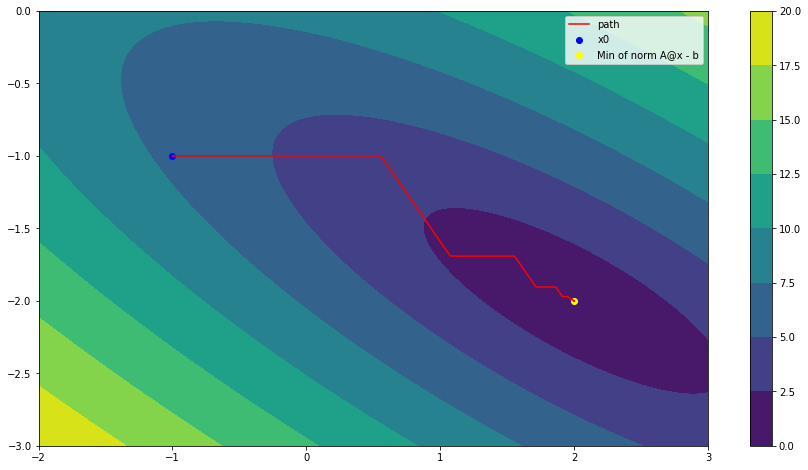

In [3]:
# протестируем на той же матрице A
def richardson(A: np.array, b: np.array, x0: np.array, n_steps: int = 100, tau: float = None):
    if not tau:
        eigen_values = np.linalg.eigvals(A)
        tau = 2/(np.min(eigen_values) + np.max(eigen_values))
    ones = np.diag(np.ones(len(A[0])))
    x = x0.copy()
    solution = np.linalg.inv(A) @ b
    error = x0 - solution
    errors = [error]
    xs = [x0]
    for i in range(n_steps + 1):
        x = x - tau*(A@x - b)
        xs.append(x)
        error = x - solution
        errors.append(error)
    return np.array(xs), np.array(errors), tau

xs, errors, tau = richardson(A, b, x0, 50) 
plot_path(xs)

In [4]:
# проверяем лемму про ошибку
i_ = 10
print(f"Error on step {i_ + 1}      {errors[i_ + 1]}")
print(f"(1 - tau*A)@error[{i_}]", (np.diag(np.ones(len(A))) - tau*A)@errors[10])
# и правда!

Error on step 11      [-0.00404553  0.00280075]
(1 - tau*A)@error[10] [-0.00404553  0.00280075]


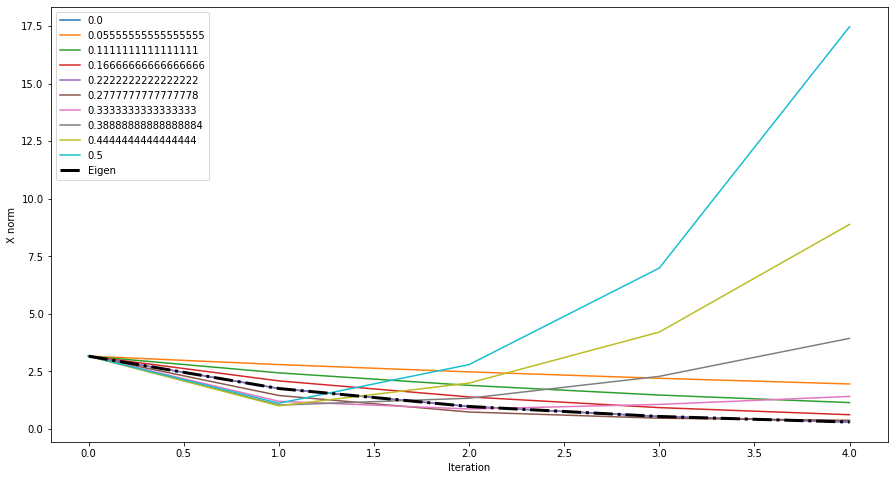

In [5]:
# видно, что при значениях меньше и больше 2/(eigen_min + eigen_max) алгоритм начинает расходиться
# при значениях меньше сходится медленнее
plt.figure(figsize=(15, 8))
for tt in np.linspace(0, 0.5, 10):
    _, errors_tmp, _ = richardson(A, b, x0, 3, tt)
    plt.plot(np.linalg.norm(errors_tmp, axis = 1), label = tt)
_, errors_best, _ = richardson(A, b, x0, 3)
plt.plot(np.linalg.norm(errors_best, axis = 1), label = "Eigen", color = "black", linestyle = "-.", linewidth = 3)
plt.ylabel("X norm")
plt.xlabel("Iteration")
plt.legend()
plt.show()

# №3

<Figure size 360x360 with 0 Axes>

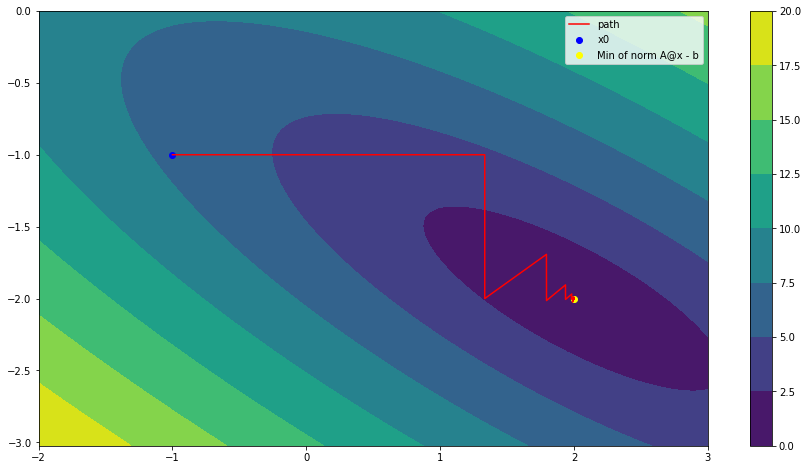

In [6]:
def conjagurate_gd(A: np.array, b: np.array, x0: np.array, n_steps: int = 100):
    x = x0.copy()
    xs = [x]
    r = A@x - b
    d = r.copy()
    ds = [d]
    alpha, beta = [], []
    for _ in range(n_steps + 1):
        alpha = (r.T@r)/(d.T@A@d)
        x = x - alpha * r
#         x = x + alpha * d
        xs.append(x)
        r_new = A@x - b
        beta = (r_new.T@r_new)/(r.T@r)
        d = r_new + beta * d
        ds.append(d)
        r = r_new
    return np.array(xs), np.array(ds)
     
xs, ds = conjagurate_gd(A, b, x0, 100)    
plot_path(xs)

In [7]:
# теперь посчитаем D как в задании
N = 3 # можно менять
D = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        D[i, j] = (ds[i].T@A@ds[j])
D

array([[ 1.47000000e+02,  3.55271368e-15,  6.06666667e+01],
       [ 1.24344979e-14,  1.01629630e+02, -2.07407407e+00],
       [ 6.06666667e+01, -2.07407407e+00,  2.50793651e+01]])

# №4

In [8]:
data = pd.read_pickle("data/data.pkl")
d, s, v, b = data["d"], data["s"], data["v"], data["b"]

v1 = np.array(v[:, 0])
v2 = np.array(v[:, 1])
# A = np.diag(d) + s[0]*v1@v1.T + s[1]*v2@v2.T # большая, но разреженная, решать обычным методом неоптимально
# np.linalg.matrix_rank(A) # не досчитывается :(

def matmul_custom(x):
    v1_, v2_ = v1 @ x, v2 @ x
    return np.multiply(x, d) + s[0]*v1_*v1 + s[1]*v2_*v2

A = sp.sparse.linalg.LinearOperator((50000, 50000), matvec = matmul_custom)

x = sp.sparse.linalg.cg(A, b)[0]
print("Norm:", np.linalg.norm(A@x - b) / np.linalg.norm(x)) # достаточно маленькая

Norm: 1.4628635043033197e-08


# №5

In [9]:
def woodbury(A: np.array, U: np.array, V: np.array):
    Ainv = np.linalg.inv(A)
    C = np.diag(np.ones(k))
    Ainv_U = Ainv@U
    return Ainv - Ainv_U@np.linalg.inv((C + V@Ainv_U))@V@Ainv

p, k = 5000, 100
A = np.diag(np.random.rand(p))
U = np.random.rand(p, k)
V = np.random.rand(k, p)

In [10]:
%time
wb_res = woodbury(A, U, V)

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 2.86 µs


In [11]:
%time
inv_res = np.linalg.inv(A + U@np.diag(np.ones(k))@V) # дольше, так как тут больше раз обращаем матрицы

CPU times: user 8 µs, sys: 25 µs, total: 33 µs
Wall time: 8.34 µs


In [12]:
# одинаковые
np.array_equal(np.round(inv_res, 6),  np.round(wb_res, 6))

False

# №6

In [35]:
np.random.seed(42)
data = np.load('data/y.npy')
Y = np.reshape(data, (10, 5000))

$\textbf{Part 1}$

Нужно минимизировать:

$$ min_Y \left[ \sum_{i=0}^{t-1}|| y_i - Y_{i\ mod\ T}||^{2} \right]
  $$

Пусть

$$
P(Y) = \sum_{i=0}^{t-1}|| y_i - Y_{i\ mod\ T}||^{2} 
$$

$$
\frac{dP(Y)}{dY_i} = -2\sum_{i=0}^{t-1} (y_i - Y_{i\ mod\ T}) = 0
$$

Тогда:


$$\sum_{i=0}^{t-1}y_i = n \sum_{j=0}^{T-1} Y_j$$

$$
Y_{min_j} = \frac{1}{n}\sum_{i=0}^{n} y_{ji}
$$

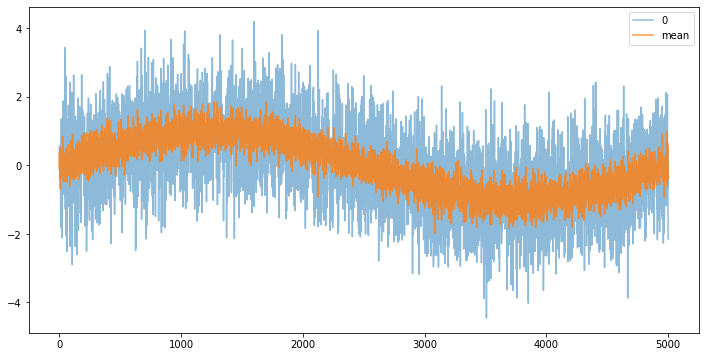

In [33]:
# в пункте 1. можем просто усреднить
plt.figure(figsize=(12, 6))
plt.plot(Y[0], alpha = 0.5, label = "0")
plt.plot(Y.mean(axis = 0), alpha = 0.8, label = "mean")
plt.legend()
plt.show()

$\textbf{Part 2}$

Теперь минимизируем:

$$
min_Y \left[ \sum_{i=0}^{t-1} || y_i - Y_{i\ mod\ T}||^{2} + \gamma\sum_{i=0}^{T-1} ||Y_i-Y_{i+1} ||^{2} \right]
$$

$$P(Y) = \sum_{i=0}^{t-1} || y_i - Y_{i\ mod\ T}||^{2} + \gamma\sum_{i=0}^{T-1} ||Y_i-Y_{i+1} ||^{2} $$

Минимум в точке, где все производные 0:

$$
\frac{d P(Y)}{d Y i}= - 2 \sum_{i=1}^{t - 1}\left(y_i - Y_{i\ mod\ T}\right)+2 \gamma\left(Y_i - Y_{i+1}\right)- 2 \gamma\left(Y_{i-1}-Y_i\right)=0 
$$

Упрощаем:
$$
-\gamma Y_{i-1} + (n+2 \gamma)Y_i - \gamma Y_{i+1}=\sum_{k=1}^{n} y_{k i}
$$

Итого у нас есть матрица размера 5000*5000. У нее запполнена только главная диагональ, диагональ под ней и диагональ над ней. Выглядят они как как в выражении выше. Столбец $b$ складывается из $y_{k i}$


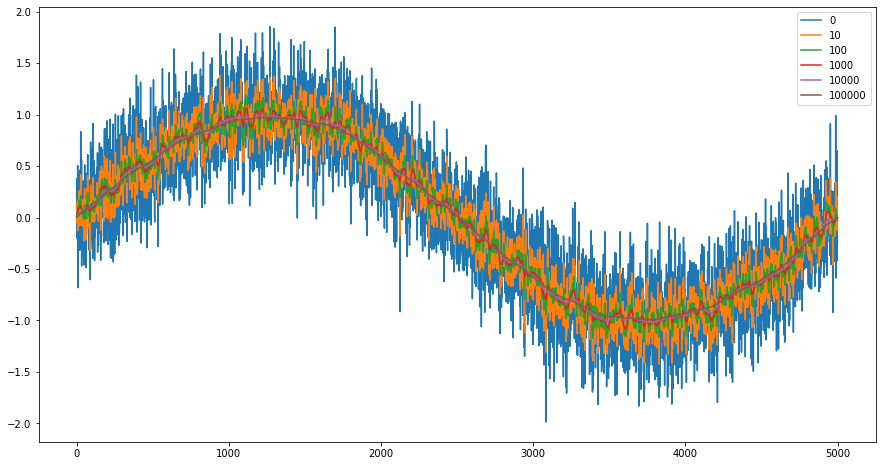

In [54]:
def smoothe(Y: np.array, gamma: float = 10):
    n = len(Y)
    T = len(Y[0])
    ones = np.ones(T)
    diagonals = np.array([-gamma*ones, (n + 2*gamma)*ones, -gamma*ones])
    A = sp.sparse.dia_matrix((diagonals, [-1,0,1]), shape=(T, T)).tocsr()
    plt.plot(sp.sparse.linalg.cg(A, Y.sum(axis=0))[0], label = gamma)
    plt.legend()

plt.figure(figsize=(15, 8))
for g in [0, 10, 100, 1000, 10000, 100000]:
    smoothe(Y, g)
# с увеличением gamma улчшается качество сигнала

# №7

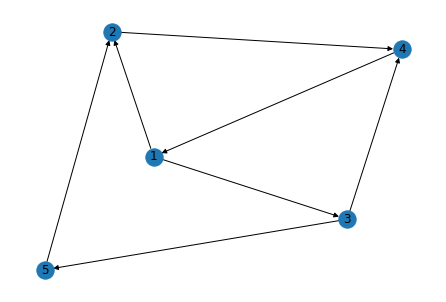

In [17]:
#пример графа
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_edges_from([(1, 2), (1, 3), (3, 4), (4, 1), (2, 4), (5, 2), (3, 5)])
nx.draw(G, with_labels=True)
plt.show()

In [18]:
# как этот граф связей запишется в виде матрицы связей между компонентами(пример)
G =  np.array(
    [np.array([0, 1, 1, 0, 0]),
     np.array([0, 0, 0, 1, 0]),
     np.array([0, 0, 0, 1, 1]),
     np.array([1, 0 ,0, 0, 0]),
     np.array([0, 1, 0, 0, 0])])



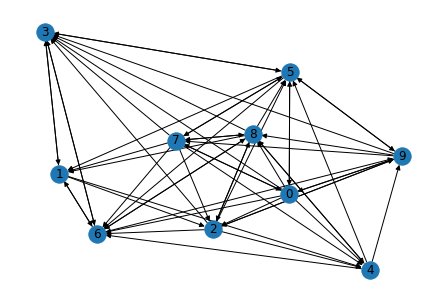

In [19]:
# теперь сгенерируем граф случайно, как в пункте 1 задания
def generate_connections_graph(n: int):
    graph = []
    l = []
    for i in range(n):
        edges = np.random.choice([0, 1], size = n)
        # убираем петли, если появляются
        edges[i] = 0
        l.append(edges)
        L_j = len(edges[edges == 1])
        # выполняем условие по нормировке
        edges = edges/L_j
        graph.append(edges)
    return np.array(graph), np.array(l)

N = 10
example_G, example_l = generate_connections_graph(N)
# большой граф связей
example_graph = nx.from_numpy_array(example_l, create_using=nx.DiGraph)
nx.draw(example_graph, with_labels=True)
plt.show()

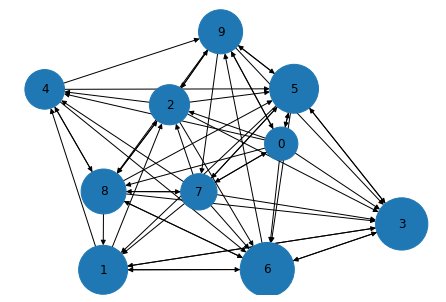

In [20]:
e = np.ones(N)
beta = 0.8
A = np.diag(e) - beta*example_G.T
b = (1 - beta)/N*e
p = np.linalg.solve(A, b) 
p = p/np.sum(p) # чтобы в сумму было 1

graph_with_weights = nx.from_numpy_array(example_l, create_using=nx.DiGraph, )
nx.draw(graph_with_weights, with_labels=True, node_size = p*20000)
plt.show()

In [21]:
p

array([0.05546416, 0.11967881, 0.08054135, 0.13646113, 0.07832926,
       0.11939992, 0.14630473, 0.06593234, 0.10075624, 0.09713205])

### Grunela датасет

In [22]:
# Формируем матрицу в numpy и также перегоняем в sp.sparse.csr_matrix
def generate_matrix_out_of_txt(file_path):
    with open(file_path, "r") as f:
        raw = [line.strip() for line in f.readlines()]
    from_, to_ = [], []
    for i in raw[4:]:
        edg = i.split("\t")
        from_.append(int(edg[0]))
        to_.append(int(edg[1]))
    N = len(from_)
    graph = np.zeros((N, N))
    for i in range(N):
        graph[from_[i], to_[i]] = 1
    # нормируем
    for i in range(len(graph)):
        edge_tmp = graph[i]
        number_of_edges_from = len(edge_tmp[edge_tmp == 1])
        if number_of_edges_from!=0:
            graph[i] = graph[i]/number_of_edges_from
    print(f"Shape of matrix: {graph.shape}")
    return graph.T

grunela_dataset = generate_matrix_out_of_txt("data/p2p-Gnutella09.txt")
# и решаем
N = len(grunela_dataset)
e = np.ones(N)
A = np.diag(e) - beta*grunela_dataset
b = (1 - beta)/N*e
A_sp = sp.sparse.csr_matrix(A) # dense представление

A_sp

Shape of matrix: (26013, 26013)


<26013x26013 sparse matrix of type '<class 'numpy.float64'>'
	with 52026 stored elements in Compressed Sparse Row format>

In [23]:
%%time
# считаем просто с np.linalg.solve
p_np = np.linalg.solve(A, b)
sum_of_p_np = np.sum(p_np)
p_np = p_np/sum_of_p_np # чтобы в сумме было 1
p_np

CPU times: user 18min 20s, sys: 29min 25s, total: 47min 46s
Wall time: 11min 48s


array([3.61434100e-05, 6.71278770e-05, 6.09113576e-05, ...,
       3.34661204e-05, 3.34661204e-05, 3.34661204e-05])

First var error 9.658295035067686e-16


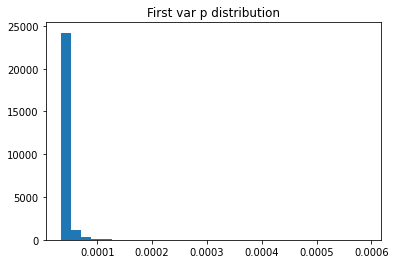

In [24]:
print(f"First var error {np.linalg.norm(A@(p_np*sum_of_p_np) - b)/np.linalg.norm(p_np*sum_of_p_np)}")
plt.title("First var p distribution")
plt.hist(p_np, bins = 30)
plt.show()
# все > 0 и очень маленькая ошибка, результат верный

In [25]:
np.max(p_np)/np.min(p_np)

17.60007021592985

In [26]:
%%time
# считаем с помощью scipy.sparse.linalg
p_sp = sp.sparse.linalg.cg(A_sp, b)[0]
sum_of_p_sp = np.sum(p_sp)
p_sp = p_sp/sum_of_p_sp # чтобы в сумме было 1

CPU times: user 14min 10s, sys: 14.6 s, total: 14min 25s
Wall time: 2min


Second var error 0.9588830071040545


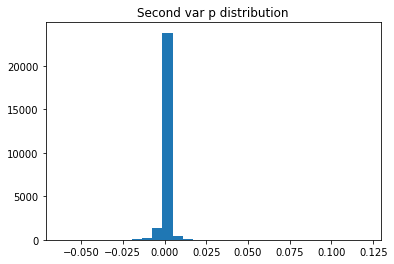

In [27]:
print(f"Second var error {np.linalg.norm(A_sp@(p_sp*sum_of_p_sp) - b)/np.linalg.norm(p_sp*sum_of_p_sp)}")
plt.title("Second var p distribution")
plt.hist(p_sp, bins = 30) # почему-то очень плохо, результат не верный, но быстрее
plt.show()

### web-Stanford датасет

In [28]:
# не влазит в оперативку :(
# web_dataset = generate_matrix_out_of_txt("data/web-Stanford.txt") 
# web_dataset